In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2, num_hidden3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, num_hidden3)
        self.fc4 = nn.Linear(num_hidden3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward (self, x):
        layer1 = self.fc1(x)
        act1 = self.sigmoid(layer1)
        layer2 = self.fc2(act1)
        act2 = self.sigmoid(layer2)
        layer3 = self.fc3(act2)
        act3 = self.sigmoid(layer3)
        layer4 = self.fc4(act3)
        out = self.sigmoid(layer4)
        return out


In [3]:
data = pd.read_csv('data.csv', header= None)
X = torch.tensor(data.drop(2, axis=1).values, dtype= torch.float)
y = torch.tensor(data[2].values, dtype= torch.float).view(-1, 1)

In [8]:
loss = nn.BCELoss()

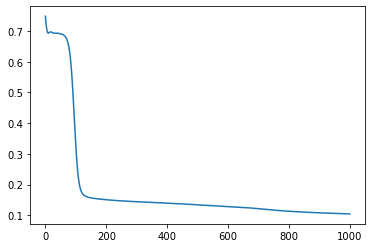

In [9]:
torch.manual_seed(0)
neuralnet = NeuralNetwork(X.shape[1], 10, 10, 10)
optimizer = torch.optim.Adam(neuralnet.parameters(), lr=0.01)

losses = []
# Training
epochs = 1000
for epoch in range(epochs):

    # predictions
    pred = neuralnet(X)

    # loss function
    l = loss(pred, y)
    
    # gradients
    l.backward()   
    
    # update parameters
    optimizer.step()

    # zero the optimizer
    optimizer.zero_grad()

    # store loss for plotting
    losses.append(l.detach())
    # print(f'Epoch {epoch}, loss {l.item():.2f}')

   
    
plt.plot(list(range(epochs)), losses)
plt.show()